In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

tf.random.set_seed(1234)

INPUT_DIM = 5

In [79]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(INPUT_DIM,)),
    tf.keras.layers.Dense(4, 'swish'),
    tf.keras.layers.Dense(3, 'swish'),
    tf.keras.layers.Dense(2, 'swish'),
    tf.keras.layers.Dense(1, use_bias=False),
])

In [88]:
class Model(tf.keras.Model):

    def __init__(self):
        super().__init__()
        self.hidden_layers = [
            tf.keras.layers.Dense(INPUT_DIM, 'swish'),
            tf.keras.layers.Dense(INPUT_DIM, 'swish'),
        ]

        self.output_layer = tf.keras.layers.Dense(1, use_bias=False)

    def call(self, x):
        for layer in self.hidden_layers:
            x += layer(x)
        x = self.output_layer(x)
        return x

model = Model()
_ = model(tf.random.uniform([1, INPUT_DIM]))

In [81]:
def flatten_and_concat(xs, batch_dims):
    values = []
    for x in xs:
        x_shape = tf.shape(x)
        batch_size = [x_shape[i] for i in range(batch_dims)]
        x_flatten = tf.reshape(x, batch_size + [-1])
        values.append(x_flatten)
    return tf.concat(values, batch_dims)

In [90]:
mat = []
param_dim = flatten(model.variables, 0).shape[0]
for i in range(param_dim):
    x = tf.random.uniform([1, INPUT_DIM], minval=-1, maxval=1)
    with tf.GradientTape() as tape:
        y = model(x)
    grads = tape.gradient(y, model.variables)
    # print(grads)
    mat.append(flatten_and_concat(grads, 0))
mat = tf.stack(mat, axis=0)
mat *= 5
tf.linalg.det(mat)

<tf.Tensor: shape=(), dtype=float32, numpy=1.2216007e-13>

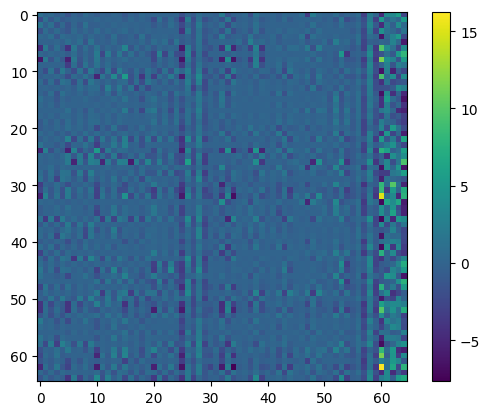

In [91]:
plt.imshow(mat)
plt.colorbar()
plt.show()